<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# PCA

### 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the dataset

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Preprocessing the data

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4. Correlation

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 5.Splitting the data

In [9]:
feature_cols = ["Pregnancies", "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X = data[feature_cols]
y = data["Outcome"]

### 6. Display the correlation with Heatmap

Text(0.5, 1.0, 'Correlation between different fearures')

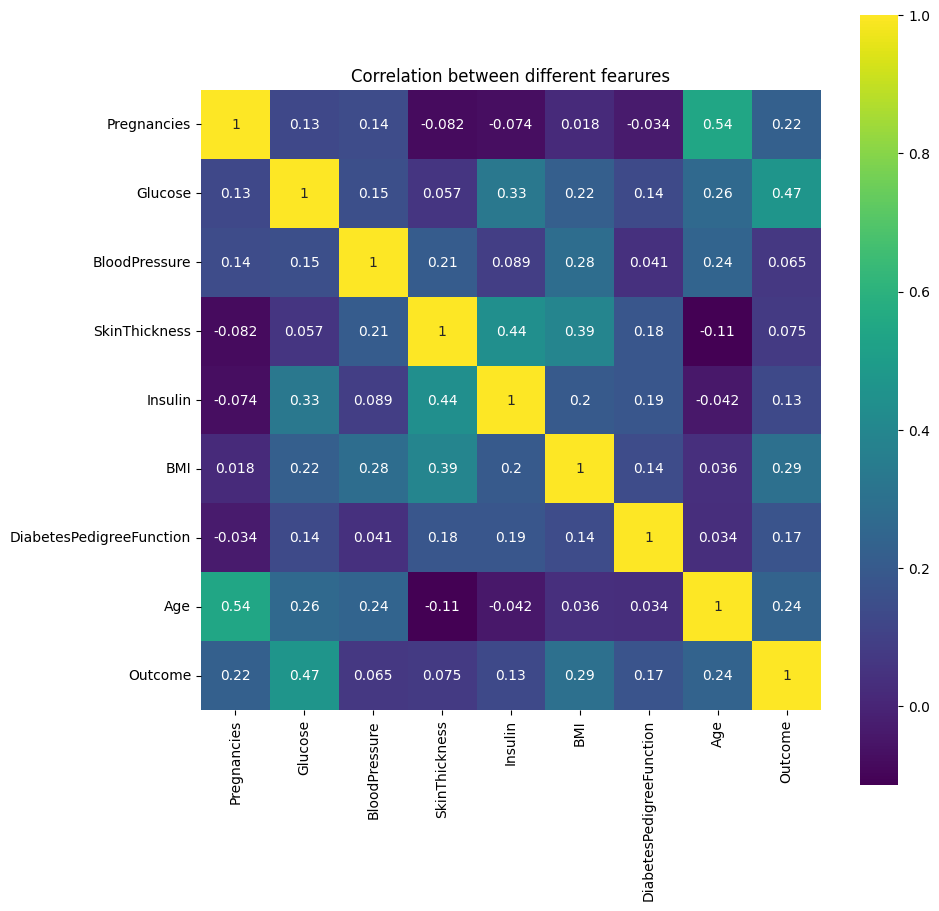

In [10]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

### 7. Standardising data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### 8. Applying the PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.06850273,  1.23489499,  0.09592984, ...,  0.35718251,
         0.85882133,  0.97430355],
       [-1.12168331, -0.73385167, -0.71293816, ..., -0.40632934,
         0.75703403,  0.35421454],
       [-0.39647671,  1.59587594,  1.76067844, ..., -0.04001752,
        -1.15299029,  1.06852795],
       ...,
       [-0.28347525,  0.09706503, -0.07719194, ..., -0.53826993,
        -0.33556321,  0.2894389 ],
       [-1.06032431,  0.83706234,  0.42503045, ...,  0.15330712,
         1.18030813, -0.53434386],
       [-0.83989172, -1.15175485, -1.00917817, ..., -0.15009639,
         0.24523536,  0.51594622]])

In [13]:
pca.get_covariance()

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [14]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

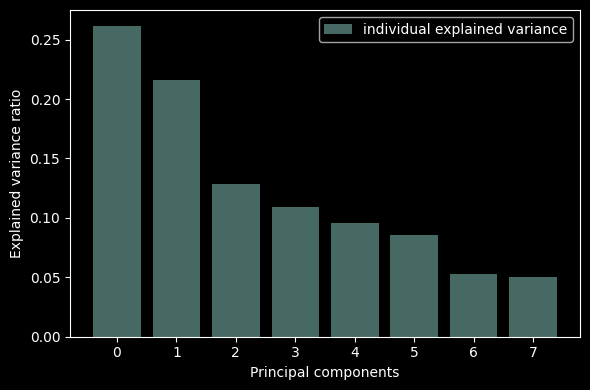

In [16]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [17]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[ 1.06850273,  1.23489499,  0.09592984,  0.4969902 , -0.10998491],
       [-1.12168331, -0.73385167, -0.71293816,  0.28505622, -0.38950719],
       [-0.39647671,  1.59587594,  1.76067844, -0.07039464,  0.90647385],
       ...,
       [-0.28347525,  0.09706503, -0.07719194, -0.68756106, -0.52300926],
       [-1.06032431,  0.83706234,  0.42503045, -0.20449292,  0.95759303],
       [-0.83989172, -1.15175485, -1.00917817,  0.0869288 , -0.08265082]])

In [18]:
pca.get_covariance()

array([[ 1.02452975,  0.13446034,  0.17284489, -0.08930001, -0.06408348,
        -0.00847476, -0.02647639,  0.50914451],
       [ 0.13446034,  1.0198715 ,  0.16402587,  0.08082209,  0.31284125,
         0.19481448,  0.1390382 ,  0.25154862],
       [ 0.17284489,  0.16402587,  0.93176052,  0.20363415,  0.0607625 ,
         0.36158472,  0.03287195,  0.22495601],
       [-0.08930001,  0.08082209,  0.20363415,  1.03928128,  0.40430749,
         0.37212741,  0.18185104, -0.10920563],
       [-0.06408348,  0.31284125,  0.0607625 ,  0.40430749,  1.01900353,
         0.25035171,  0.18250259, -0.04023581],
       [-0.00847476,  0.19481448,  0.36158472,  0.37212741,  0.25035171,
         0.92801752,  0.15197404,  0.04541882],
       [-0.02647639,  0.1390382 ,  0.03287195,  0.18185104,  0.18250259,
         0.15197404,  1.00059389,  0.02819631],
       [ 0.50914451,  0.25154862,  0.22495601, -0.10920563, -0.04023581,
         0.04541882,  0.02819631,  1.04737226]])

In [19]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305])

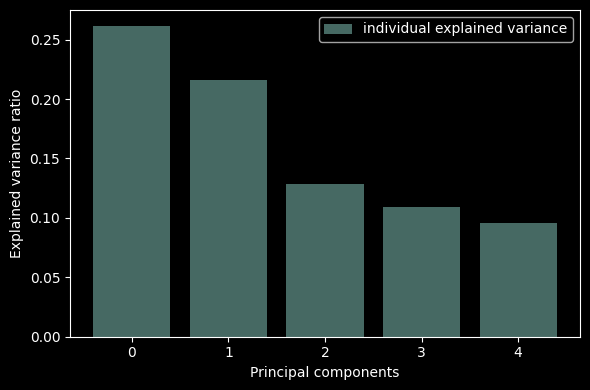

In [20]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


